### Implementing Multivariate Skew-Normal Distribution (MVSN) for better data modelling accuracy for Synthetic Data Generation

In the current implementation of the Tabular Synthetic Data Generator, data is sampled from a Multivariate Normal Distribution (MVN).
The implementation incorporates standard deviations and correlations (through a covariance matrix). The MVSN builds on top of this by incorporating variable/column skew values 
for (hopefully) better accuracy in modelling the joint distribution of the variables.

In [7]:
from synthetic_data.multivar_skew_norm import MultivariateSkewNorm 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as mvn

Comparing the bivariate case between the mvn and the mvsn

In [11]:
cov = np.asarray([[1.5,-0.9],[-0.9,1.5]])
skew = [7,-3]
zeros = np.zeros(2)
SAMPLE_SIZE = 10000

/Users/HMW373/Documents/synthetic-data/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


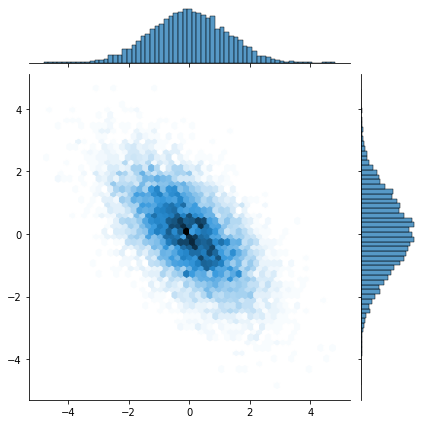

In [19]:
# MVN Distribution
mvn_samples = mvn(zeros, cov).rvs(SAMPLE_SIZE)
sns.jointplot(mvn_samples[:, 0], mvn_samples[:, 1], kind="hex")
plt.show()

/Users/HMW373/Documents/synthetic-data/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


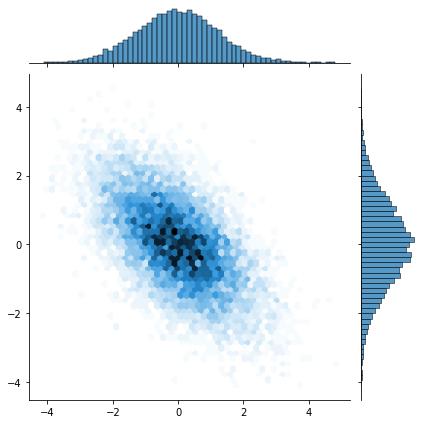

In [20]:
# MVSN Distribution
# As a special case, the MVSN should be similar to the MVN if skews are 0
# Albeit not exactly identical, the distribution is very similar judging by inspection
mvsn = MultivariateSkewNorm(cov, zeros)
mvsn_samples = mvsn.rvs(SAMPLE_SIZE)
sns.jointplot(mvsn_samples[:, 0], mvsn_samples[:, 1], kind="hex")
plt.show()

/Users/HMW373/Documents/synthetic-data/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


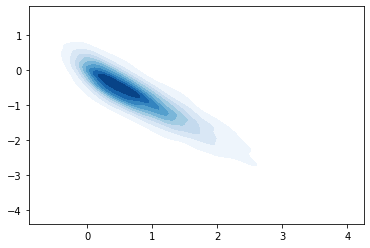

In [14]:
# With the skews
mvsn = MultivariateSkewNorm(cov, skew)
mvsn_samples = mvsn.rvs(SAMPLE_SIZE)
sns.jointplot(mvsn_samples[:, 0], mvsn_samples[:, 1], kind="hex")
plt.show()

/Users/HMW373/Documents/synthetic-data/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


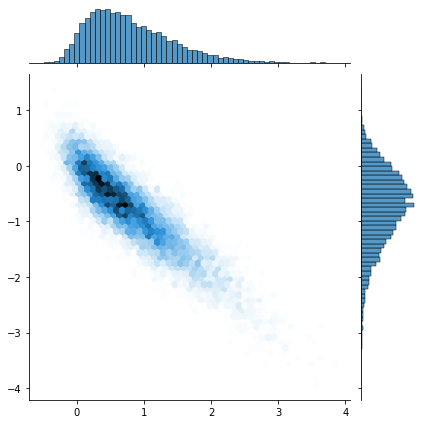

In [18]:
# MVSN Joint distribution
sns.jointplot(mvsn_samples[:, 0], mvsn_samples[:, 1], kind="hex")
plt.show()